# Assignment 2 (ST813)

## Exercise 1

#### (Data Exploration)

In [1]:
# load data
load("Data_Assignment2_Ex1_E2024.rdata")
ls()

[1] "data"

In [2]:
head(data)

,age,DBH,height,diameter,nrtrees,origin,country,longitude,latitude,ecoregion,biomfoliage
,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,51,20.4,18.5,3.70,986,Natural,UKR,27.00,51.00,80412,1.732
2,68,17.8,16.0,4.00,3950,Natural,KAZ,65.00,53.17,80810,2.556
3,21,4.4,7.3,1.50,6210,Natural,UKR,28.00,51.00,80412,0.364
4,158,45.9,30.3,4.90,240,Natural,UKR,30.30,50.45,80412,40.381
5,31,5.3,7.1,0.93,19980,Natural,RUS,84.83,56.42,80817,0.045
6,30,14.5,12.5,1.80,2154,Natural,UKR,27.00,51.00,80412,6.449


In [3]:
# Create table containing relevant summary measures for each of the variables individually
summary(data)

      age              DBH            height         diameter     
 Min.   :  8.00   Min.   : 0.90   Min.   : 2.14   Min.   : 0.390  
 1st Qu.: 24.00   1st Qu.: 7.03   1st Qu.: 8.03   1st Qu.: 1.400  
 Median : 31.00   Median :10.60   Median :11.60   Median : 2.000  
 Mean   : 42.16   Mean   :12.89   Mean   :12.69   Mean   : 2.258  
 3rd Qu.: 50.00   3rd Qu.:16.55   3rd Qu.:16.30   3rd Qu.: 2.800  
 Max.   :186.00   Max.   :48.80   Max.   :36.60   Max.   :13.900  
                                                                  
    nrtrees          origin    country     longitude        latitude    
 Min.   :  108   Planted: 94   UKR:184   Min.   :24.00   Min.   :46.50  
 1st Qu.: 1450   Natural:253   KAZ:102   1st Qu.:27.00   1st Qu.:51.00  
 Median : 2286                 RUS: 61   Median :33.00   Median :51.00  
 Mean   : 3932                           Mean   :48.74   Mean   :51.56  
 3rd Qu.: 4052                           3rd Qu.:65.00   3rd Qu.:52.33  
 Max.   :19980            

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


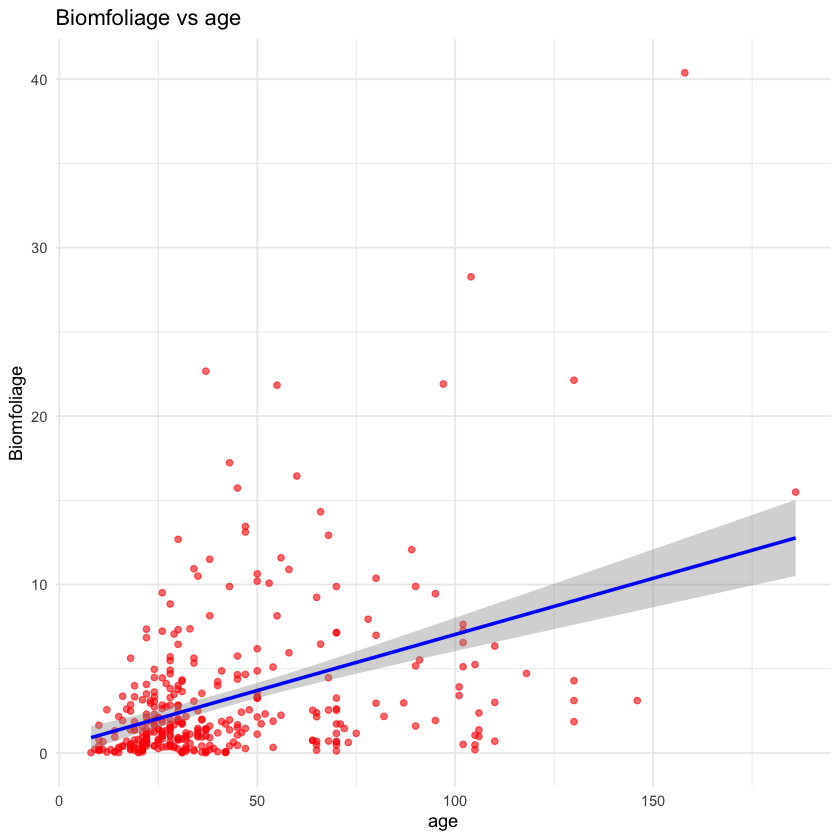

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


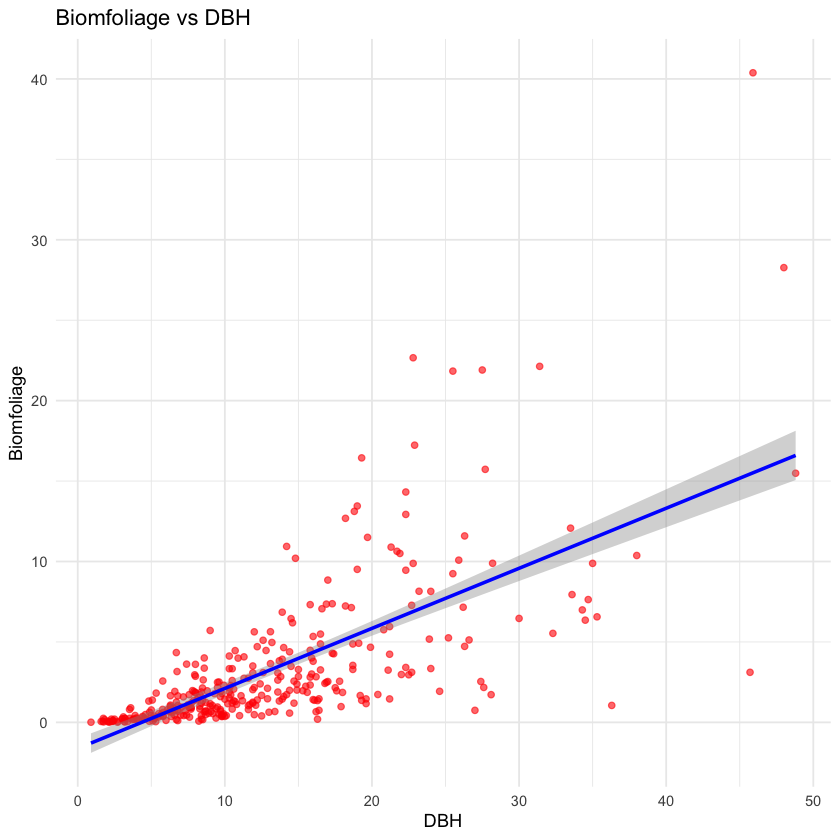

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


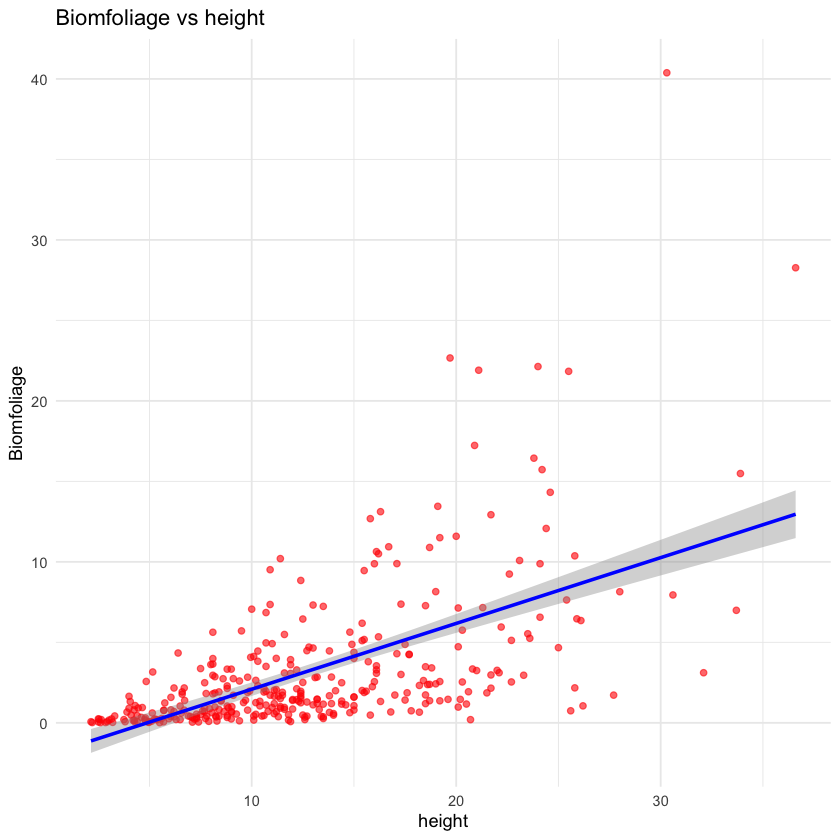

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


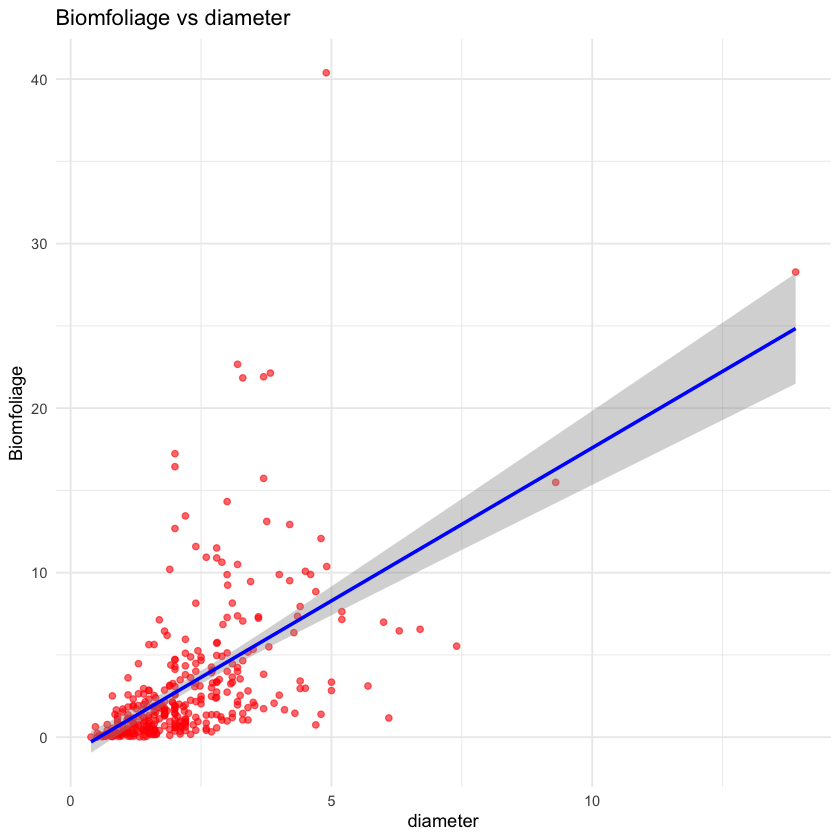

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


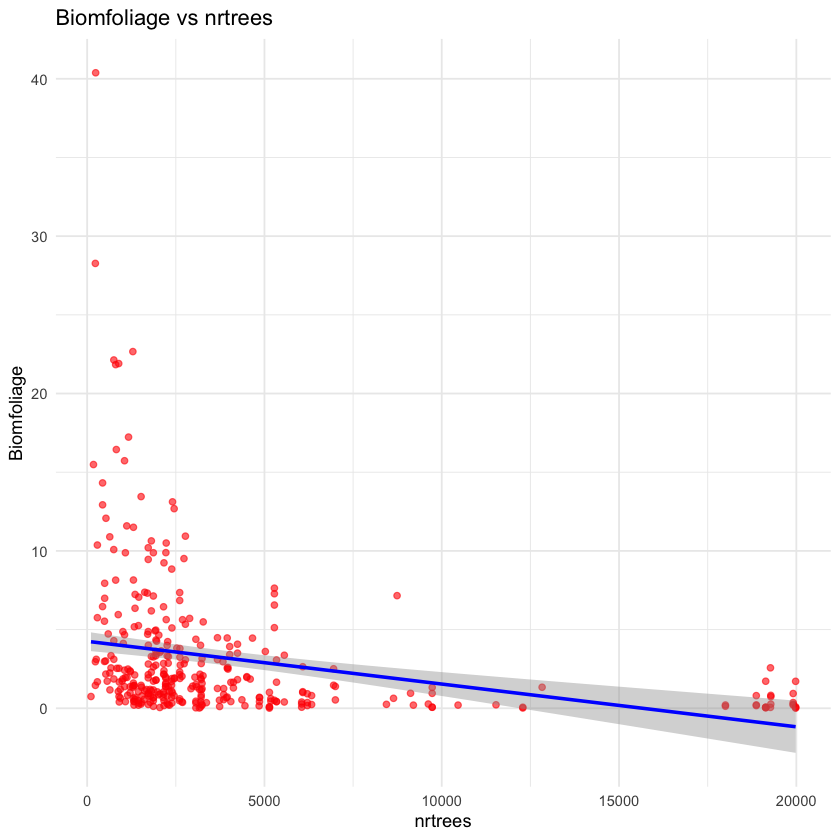

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


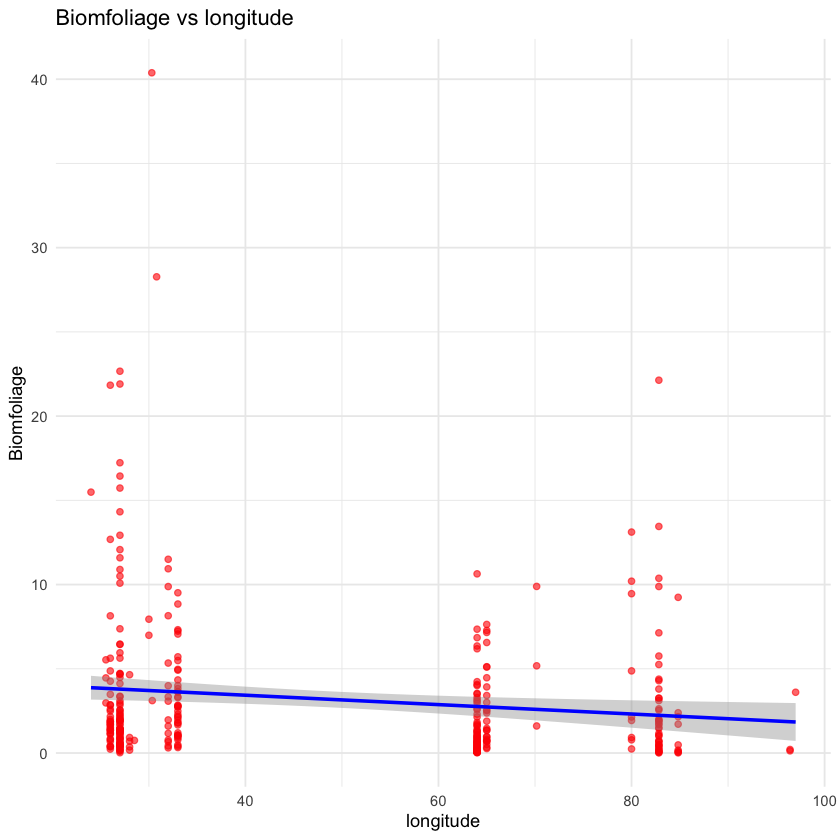

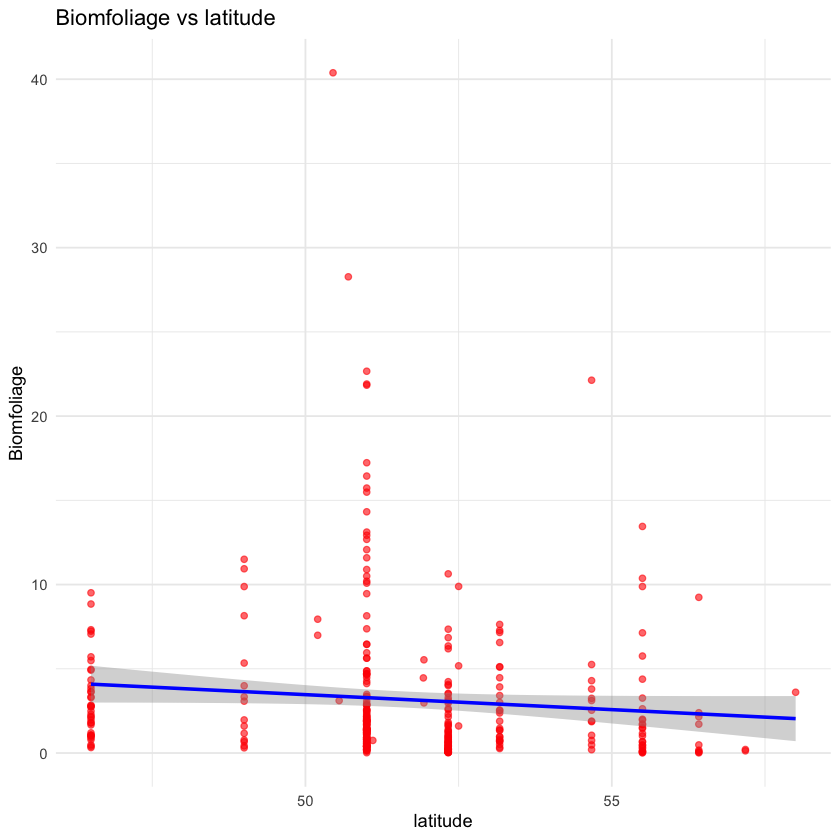

In [4]:
# make suitable plots to show relation between biomfoliage and the other variables in data
library(ggplot2)
library(gridExtra)

# List of variables to analyse
var_names <- c('age', 'DBH', 'height', 'diameter', 'nrtrees', 'origin', 
               'country', 'longitude', 'latitude', 'ecoregion')

library(ggplot2)

# Loop through numerical variables
num_vars <- c('age', 'DBH', 'height', 'diameter', 'nrtrees', 'longitude', 'latitude')

for (var in num_vars) {
  p <- ggplot(data, aes_string(x = var, y = 'biomfoliage')) +
    geom_point(alpha = 0.6, color = 'red') +  
    geom_smooth(method = 'lm', color = 'blue') +  
    labs(title = paste('Biomfoliage vs', var),
         x = var, y = 'Biomfoliage') +
    theme_minimal()
  print(p)
  
  file_name <- paste0("scatterplot_biomfoliage_vs_", var, ".pdf")
  ggsave(file_name, plot = p, width = 8, height = 6)
}


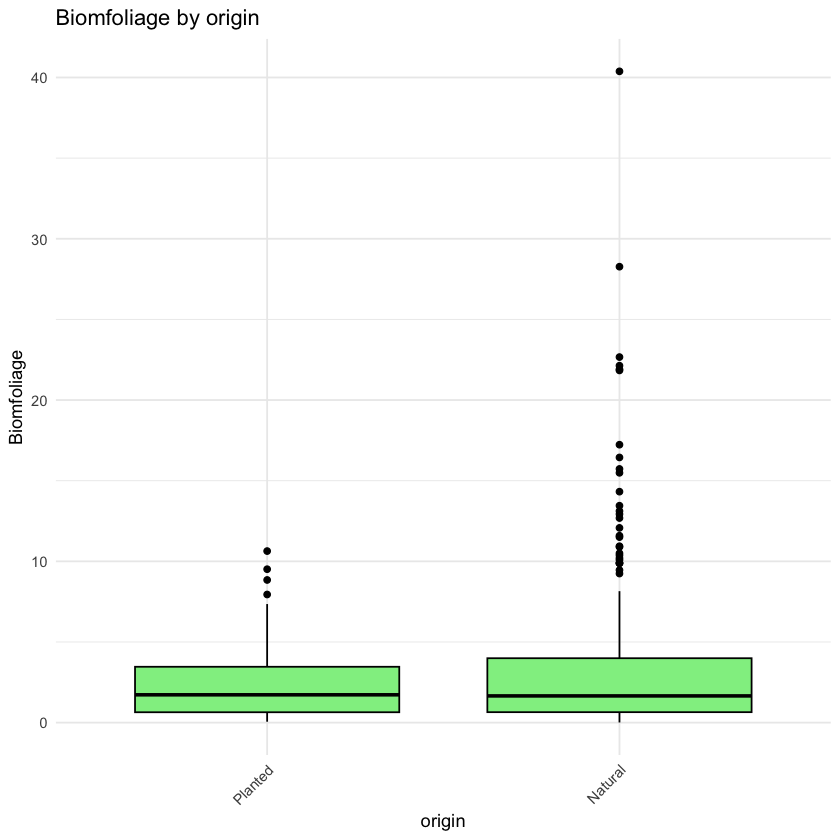

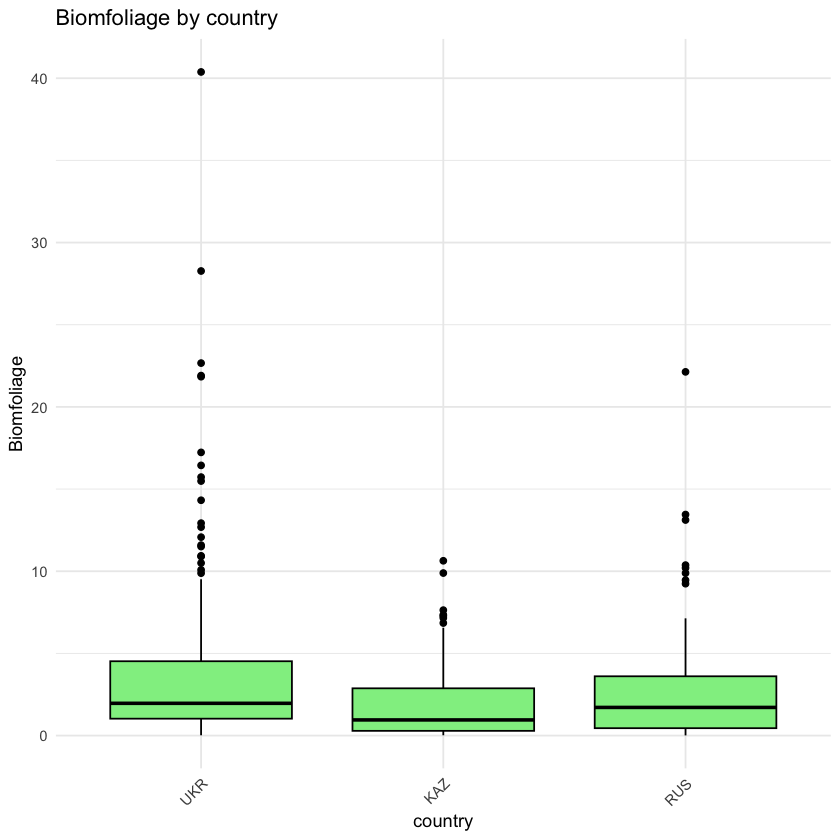

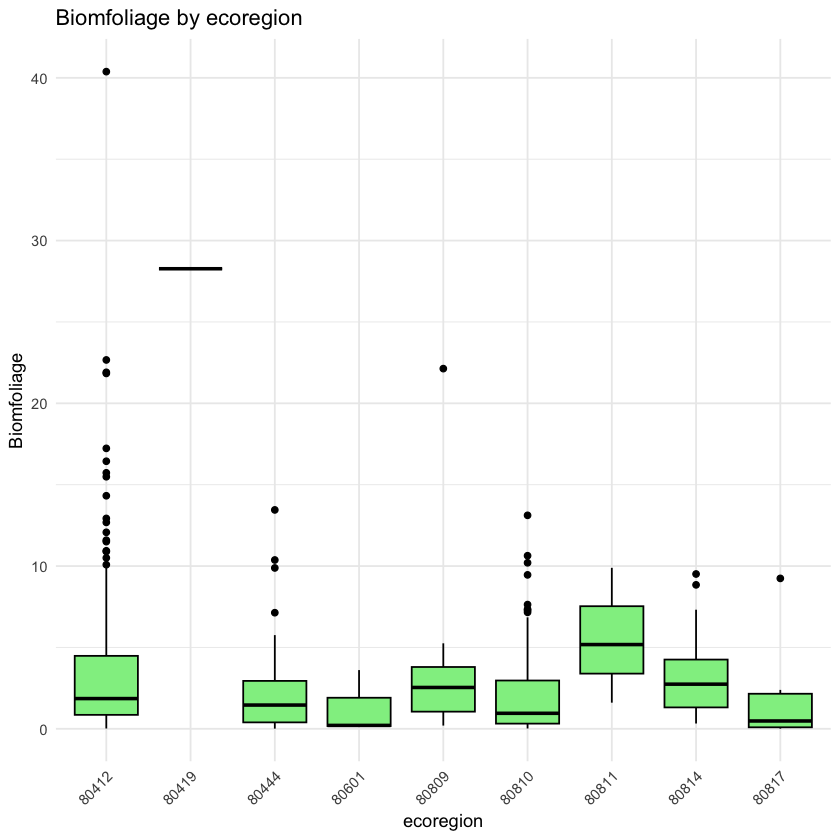

In [5]:
cat_vars <- c('origin', 'country', 'ecoregion')

for (var in cat_vars) {
  p <- ggplot(data, aes_string(x = var, y = 'biomfoliage')) +
    geom_boxplot(fill = "lightgreen", color = "black") +
    labs(title = paste("Biomfoliage by", var), x = var, y = "Biomfoliage") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  print(p)
  
  file_name <- paste0("boxplot_biomfoliage_by_", var, ".pdf")
  ggsave(file_name, plot = p, width = 8, height = 6)
}


In [6]:
library(GGally)

# Select numerical variables
numeric_vars <- data[, c('biomfoliage', num_vars)]
pl = ggpairs(numeric_vars, aes(alpha = 0.6))
# save the plot
ggsave("ggpairs.pdf", plot = pl)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Saving 7 x 7 in image


#### (Model Extension)

Select a suitable Generalised Linear Model (GLM) for `biomfoliage` that can be used to relate foliage biomass to the other available variables.

1. State and explain which main classes of GLM are applicable in this situation

The choice of the GLM class depends on the nature of the response variable and the assumptions about its distribution. 

If `biomfoliage` is a continuous variables that (approximately) follows a normal distribution, then the Gaussian GLM can be applied. If the response variable is strictly positive, the Gamma GLM can also be used, in addition, if the data also appear to follow a log-normal distribution, then one could consider the Log-Normal GLM. To choose the best GLM one can first visualise the data to assess the skewness and heteroscedasticity/non-linear patterns.

In [7]:
# Histogram of biomfoliage
dis = ggplot(data, aes(x = biomfoliage)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Biomfoliage", x = "Biomfoliage", y = "Frequency") +
  theme_minimal()
ggsave("biomdistribution.pdf", plot = dis)

Saving 7 x 7 in image


From the distribution of `biomfoliage` one can see its strictly positive and right skewed.

2. As well as the link functions considered together with these (GLM models)

The choice of link function will be critical as it connects the linear predictor for the expected mean of the response variable. The Gaussian GLM has the identity link as the default but can use the log link as an alternative. The log link helps addressing skewness as well as ensuring positivity. The Gamma GLM also uses the log link, but as a default, while ithe inverse link is the alternative. The Log-Normal GLM is used by applying a log transformation to the response variable and thus, applies a log link.

For this data, including the aforementioned reasons, the Gamma GLM will be chosen as the log link is interpretable and handles right-skewed distributions (typical of positive continuous data).

One can also visualise the link functions to further argument which GLM to use for `biomfoliage`, however, that seems redundant and thus, it can be concluded the Gamma GLM will be used.

3. In case there should be several possible alternatives for 1. and 2., use appropriate methods from the course to make an informed choice between the different alternatives. Explain your reasoning and provide details.

In [8]:
# Fit GLMs with different distributions and link functions
glm_gamma_log <- glm(biomfoliage ~ age + DBH + height + diameter + origin + 
                     ecoregion + nrtrees + longitude + latitude + country, 
                     family = Gamma(link = "log"), data = data)

glm_gaussian_log <- glm(biomfoliage ~ age + DBH + height + diameter + origin + 
                        ecoregion + nrtrees + longitude + latitude + country, 
                        family = gaussian(link = "log"), data = data)

glm_poisson <- glm(biomfoliage ~ age + DBH + height + diameter + origin + 
                   ecoregion + nrtrees + longitude + latitude + country, 
                   family = poisson(link = "log"), data = data)

# Compare Models using AIC
model_comparison <- AIC(glm_gamma_log, glm_gaussian_log, glm_poisson)

# Print model comparison
print(model_comparison)


Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.732000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.556000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.364000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.381000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.045000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 6.449000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.112000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.748000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.532000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 12.074000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.293000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 0.056000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.798000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 

                 df      AIC
glm_gamma_log    19 1156.767
glm_gaussian_log 19 1817.853
glm_poisson      18      Inf


This is already argued for in the two previous sections.

4. Apply appropriate methods from the course to investigate the functional form in which explanatory variables are included in the linear predictor and whether selected interactions should be taken into account.
5. Select a parsimonious model, i.e. reduce model complexity and number of included
explanatory variables as much as possible. Explain which principles you use for model selection.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


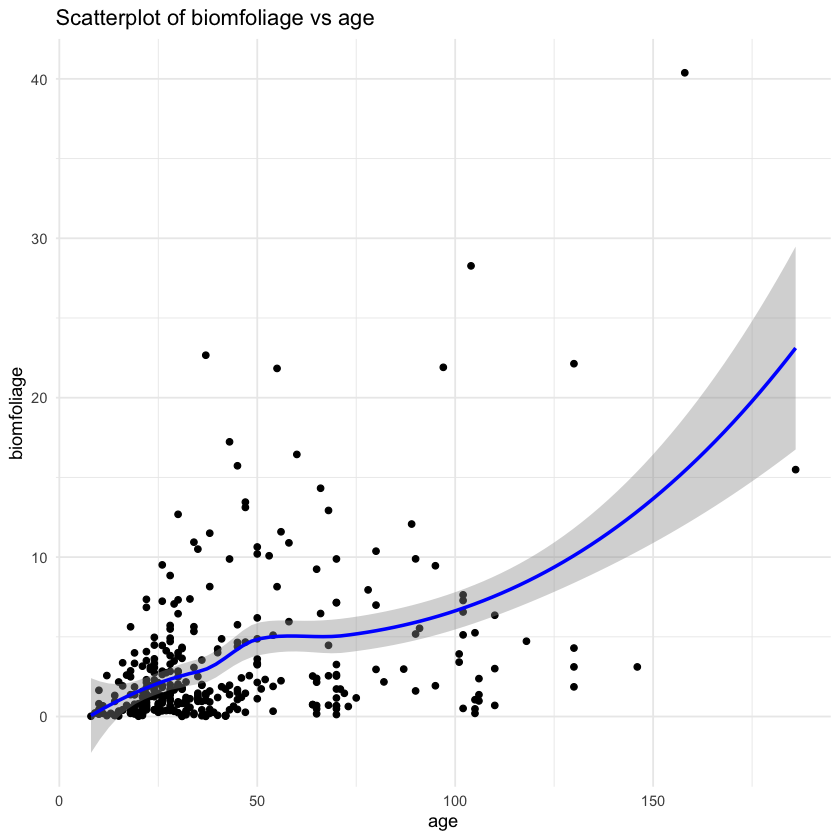

`geom_smooth()` using formula = 'y ~ x'


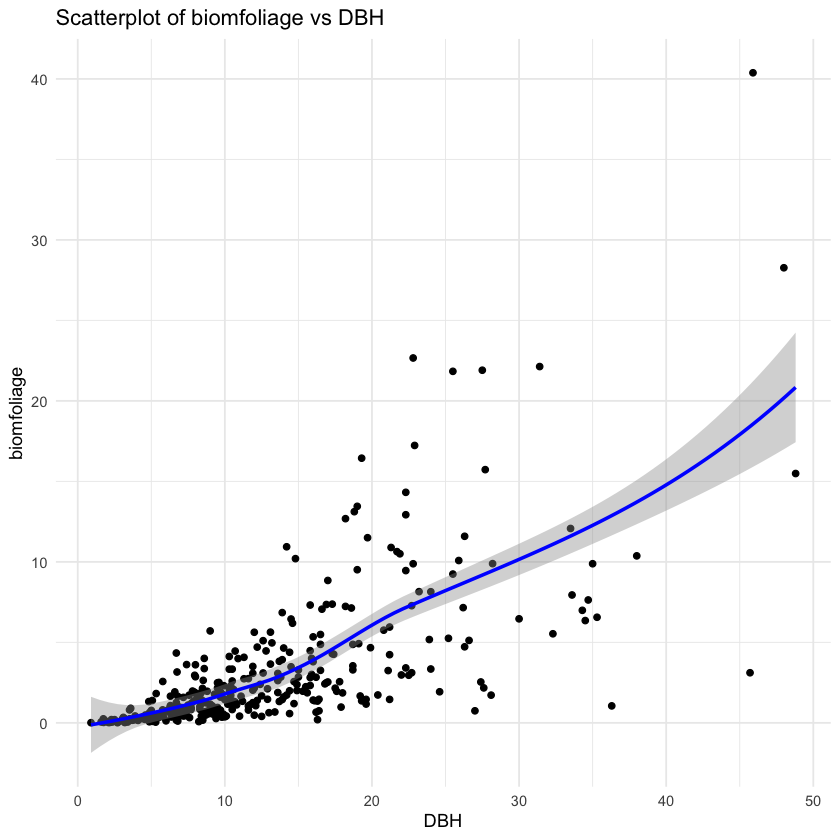

`geom_smooth()` using formula = 'y ~ x'


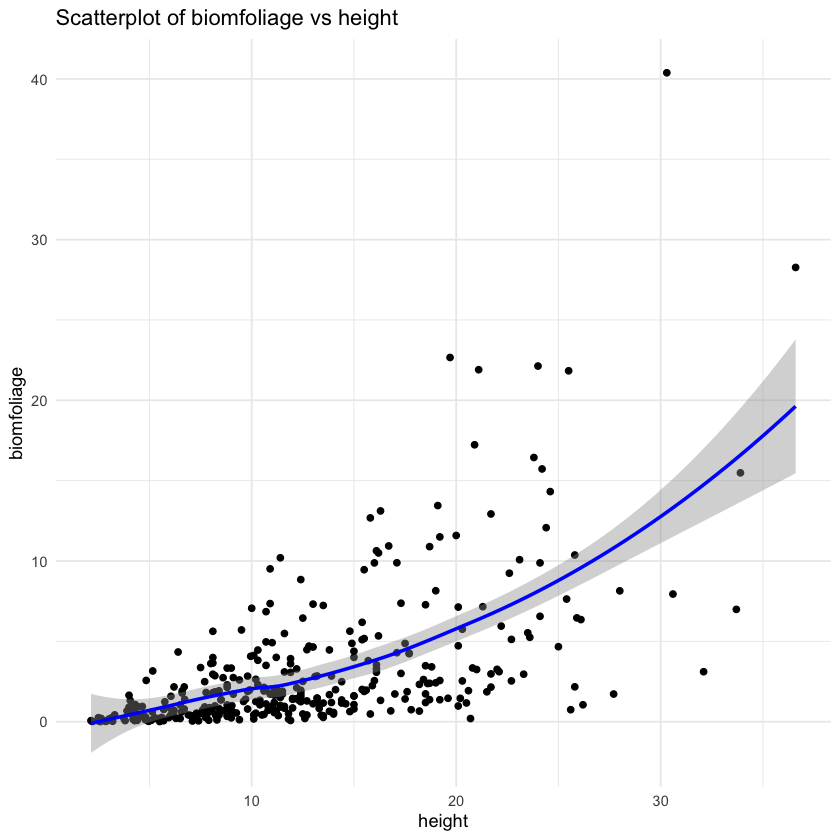

`geom_smooth()` using formula = 'y ~ x'


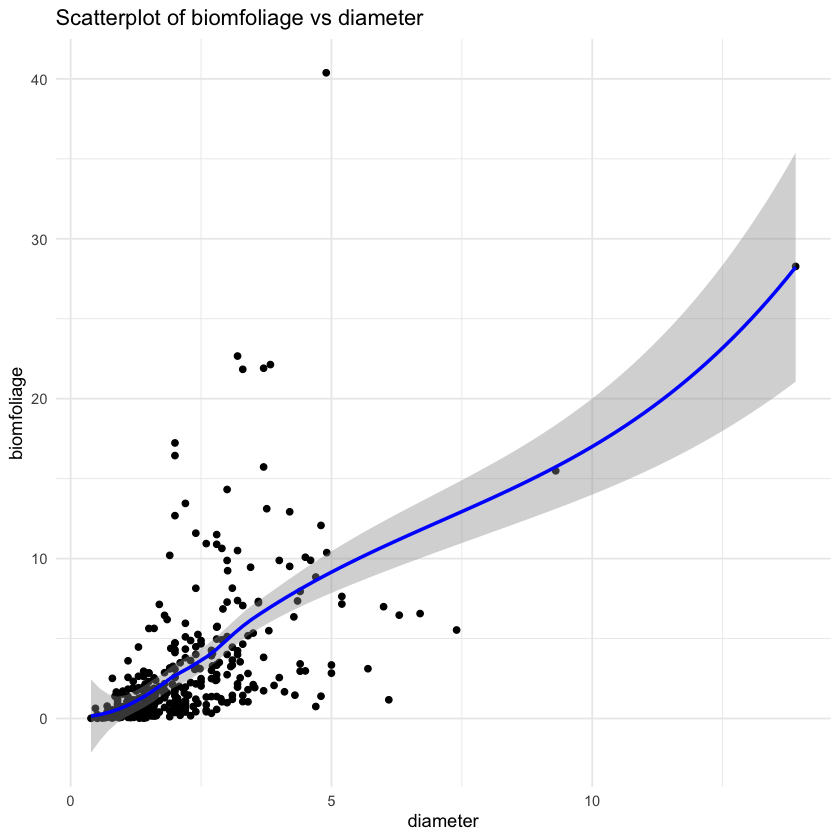

`geom_smooth()` using formula = 'y ~ x'


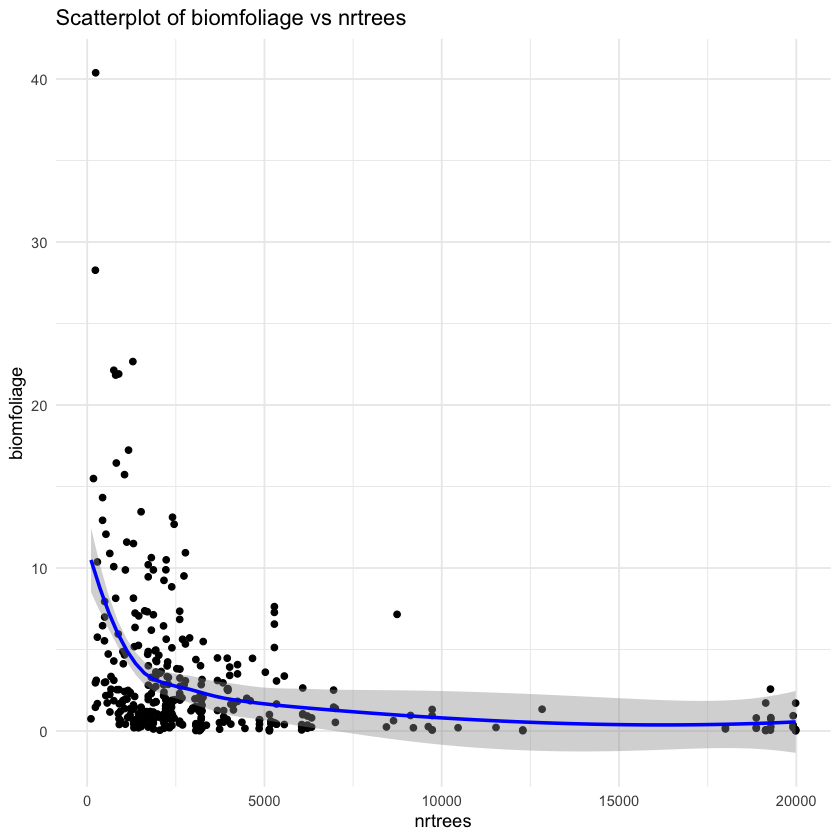

`geom_smooth()` using formula = 'y ~ x'


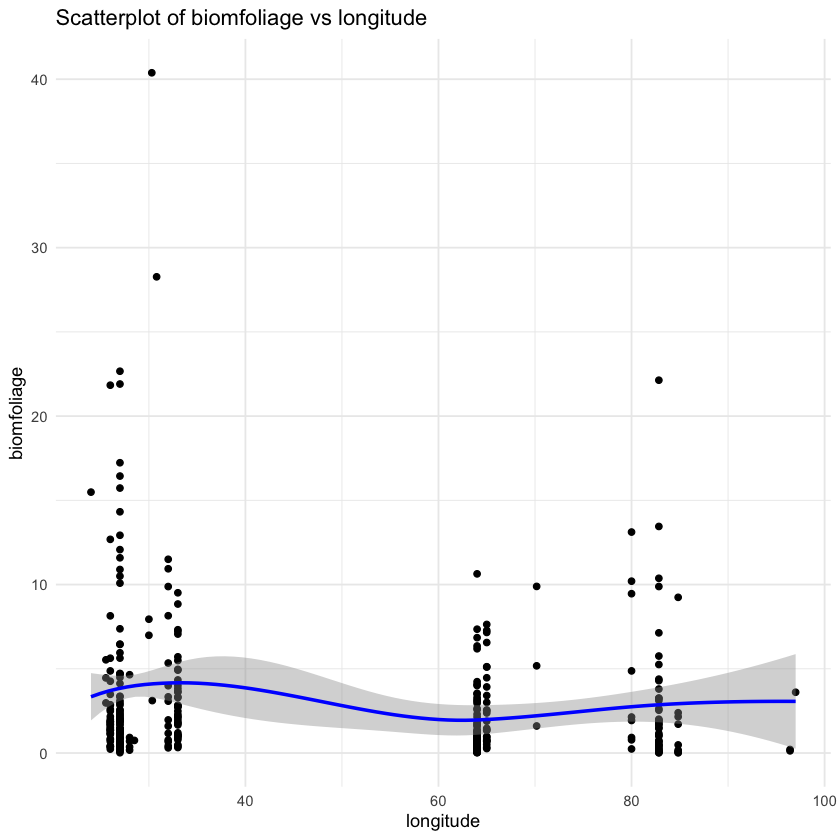

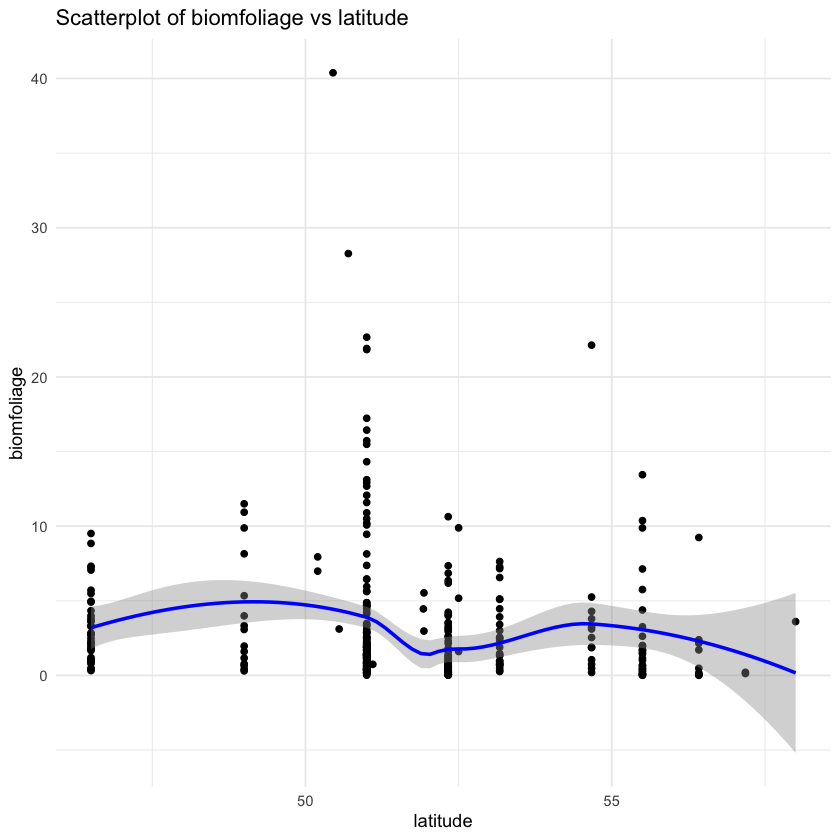

In [9]:
library(ggplot2)

# Scatter plots of predictors vs biomfoliage
predictors <- c("age", "DBH", "height", "diameter", "nrtrees", "longitude", "latitude")
for (var in predictors) {
    ggplot(data, aes_string(x = var, y = "biomfoliage")) +
        geom_point() +
        geom_smooth(method = "loess", color = "blue") +
        ggtitle(paste("Scatterplot of biomfoliage vs", var)) +
        theme_minimal() -> p
    print(p)
}


In [10]:
library(splines)
glm_spline <- glm(biomfoliage ~ ns(age, 3) + ns(DBH, 3) + height + diameter + 
                  origin + ecoregion + nrtrees + longitude + latitude + country, 
                  family = Gamma(link = "log"), data = data)
summary(glm_spline)



Call:
glm(formula = biomfoliage ~ ns(age, 3) + ns(DBH, 3) + height + 
    diameter + origin + ecoregion + nrtrees + longitude + latitude + 
    country, family = Gamma(link = "log"), data = data)

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.670e+00  9.084e+00  -0.514  0.60757    
ns(age, 3)1    -1.240e+00  4.134e-01  -2.999  0.00292 ** 
ns(age, 3)2    -1.564e+00  6.544e-01  -2.390  0.01743 *  
ns(age, 3)3    -3.207e-01  6.713e-01  -0.478  0.63314    
ns(DBH, 3)1     4.741e+00  4.468e-01  10.611  < 2e-16 ***
ns(DBH, 3)2     9.813e+00  9.163e-01  10.709  < 2e-16 ***
ns(DBH, 3)3     5.338e+00  8.760e-01   6.094 3.12e-09 ***
height          2.170e-03  2.402e-02   0.090  0.92808    
diameter       -1.330e-01  6.015e-02  -2.212  0.02768 *  
originNatural  -3.630e-01  1.679e-01  -2.162  0.03133 *  
ecoregion80419  1.447e+00  9.466e-01   1.529  0.12721    
ecoregion80444 -3.349e+00  3.876e+00  -0.864  0.388

In [11]:
glm_interaction <- glm(biomfoliage ~ age * DBH + height + diameter + origin + 
                       ecoregion + nrtrees + longitude + latitude + country, 
                       family = Gamma(link = "log"), data = data)
summary(glm_interaction)



Call:
glm(formula = biomfoliage ~ age * DBH + height + diameter + origin + 
    ecoregion + nrtrees + longitude + latitude + country, family = Gamma(link = "log"), 
    data = data)

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.214e+01  9.496e+00  -1.279   0.2019    
age             4.649e-04  4.837e-03   0.096   0.9235    
DBH             1.924e-01  2.348e-02   8.192 5.79e-15 ***
height         -7.279e-04  2.325e-02  -0.031   0.9750    
diameter       -5.534e-02  6.530e-02  -0.848   0.3973    
originNatural  -4.457e-01  1.753e-01  -2.542   0.0115 *  
ecoregion80419 -1.179e+00  9.575e-01  -1.232   0.2189    
ecoregion80444 -6.448e+00  4.071e+00  -1.584   0.1142    
ecoregion80601 -7.402e+00  5.225e+00  -1.417   0.1576    
ecoregion80809 -6.175e+00  3.937e+00  -1.569   0.1177    
ecoregion80810 -4.661e+00  3.291e+00  -1.416   0.1577    
ecoregion80811 -5.199e+00  3.617e+00  -1.437   0.1515    
ecoregi

In [12]:
glm_no_interaction <- glm(biomfoliage ~ age + DBH + height + diameter + origin + 
                          ecoregion + nrtrees + longitude + latitude + country, 
                          family = Gamma(link = "log"), data = data)

anova(glm_no_interaction, glm_interaction, test = "Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,329,230.3874,NA,NA,NA
2,328,220.0367,1,10.3507,4.072312e-05


In [13]:
glm_full <- glm(biomfoliage ~ (age + DBH + height + diameter + origin + 
                               ecoregion + nrtrees + longitude + latitude + country)^2, 
                family = Gamma(link = "log"), data = data)

glm_step <- step(glm_full, direction = "both")
summary(glm_step)


Start:  AIC=1082.2
biomfoliage ~ (age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country)^2



Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=1082.2
biomfoliage ~ age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:DBH + age:height + 
    age:diameter + age:origin + age:ecoregion + age:nrtrees + 
    age:longitude + age:latitude + age:country + DBH:height + 
    DBH:diameter + DBH:origin + DBH:ecoregion + DBH:nrtrees + 
    DBH:longitude + DBH:latitude + DBH:country + height:diameter + 
    height:origin + height:ecoregion + height:nrtrees + height:longitude + 
    height:latitude + height:country + diameter:origin + diameter:ecoregion + 
    diameter:nrtrees + diameter:longitude + diameter:latitude + 
    diameter:country + origin:ecoregion + origin:nrtrees + origin:longitude + 
    origin:latitude + origin:country + ecoregion:nrtrees + ecoregion:longitude + 
    ecoregion:latitude + ecoregion:country + nrtrees:longitude + 
    nrtrees:latitude + nrtrees:country + longitude:latitude + 
    longitude:country



Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=1082.2
biomfoliage ~ age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:DBH + age:height + 
    age:diameter + age:origin + age:ecoregion + age:nrtrees + 
    age:longitude + age:latitude + age:country + DBH:height + 
    DBH:diameter + DBH:origin + DBH:ecoregion + DBH:nrtrees + 
    DBH:longitude + DBH:latitude + DBH:country + height:diameter + 
    height:origin + height:ecoregion + height:nrtrees + height:longitude + 
    height:latitude + height:country + diameter:origin + diameter:ecoregion + 
    diameter:nrtrees + diameter:longitude + diameter:latitude + 
    diameter:country + origin:ecoregion + origin:nrtrees + origin:longitude + 
    origin:latitude + origin:country + ecoregion:nrtrees + ecoregion:longitude + 
    ecoregion:latitude + ecoregion:country + nrtrees:longitude + 
    nrtrees:latitude + nrtrees:country + longitude:latitude



Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=1082.2
biomfoliage ~ age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:DBH + age:height + 
    age:diameter + age:origin + age:ecoregion + age:nrtrees + 
    age:longitude + age:latitude + age:country + DBH:height + 
    DBH:diameter + DBH:origin + DBH:ecoregion + DBH:nrtrees + 
    DBH:longitude + DBH:latitude + DBH:country + height:diameter + 
    height:origin + height:ecoregion + height:nrtrees + height:longitude + 
    height:latitude + height:country + diameter:origin + diameter:ecoregion + 
    diameter:nrtrees + diameter:longitude + diameter:latitude + 
    diameter:country + origin:ecoregion + origin:nrtrees + origin:longitude + 
    origin:latitude + origin:country + ecoregion:nrtrees + ecoregion:longitude + 
    ecoregion:latitude + nrtrees:longitude + nrtrees:latitude + 
    nrtrees:country + longitude:latitude



Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=1082.2
biomfoliage ~ age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:DBH + age:height + 
    age:diameter + age:origin + age:ecoregion + age:nrtrees + 
    age:longitude + age:latitude + age:country + DBH:height + 
    DBH:diameter + DBH:origin + DBH:ecoregion + DBH:nrtrees + 
    DBH:longitude + DBH:latitude + DBH:country + height:diameter + 
    height:origin + height:ecoregion + height:nrtrees + height:longitude + 
    height:latitude + height:country + diameter:origin + diameter:ecoregion + 
    diameter:nrtrees + diameter:longitude + diameter:latitude + 
    diameter:country + origin:ecoregion + origin:nrtrees + origin:longitude + 
    origin:latitude + origin:country + ecoregion:nrtrees + ecoregion:longitude + 
    nrtrees:longitude + nrtrees:latitude + nrtrees:country + 
    longitude:latitude



Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=1082.2
biomfoliage ~ age + DBH + height + diameter + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:DBH + age:height + 
    age:diameter + age:origin + age:ecoregion + age:nrtrees + 
    age:longitude + age:latitude + age:country + DBH:height + 
    DBH:diameter + DBH:origin + DBH:ecoregion + DBH:nrtrees + 
    DBH:longitude + DBH:latitude + DBH:country + height:diameter + 
    height:origin + height:ecoregion + height:nrtrees + height:longitude + 
    height:latitude + height:country + diameter:origin + diameter:ecoregion + 
    diameter:nrtrees + diameter:longitude + diameter:latitude + 
    diameter:country + origin:ecoregion + origin:nrtrees + origin:longitude + 
    origin:latitude + ecoregion:nrtrees + ecoregion:longitude + 
    nrtrees:longitude + nrtrees:latitude + nrtrees:country + 
    longitude:latitude



Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:ecoregion   4   136.63 1077.2
- ecoregion:nrtrees    3   135.65 1077.2
- DBH:ecoregion        4   137.89 1079.8
- DBH:country          1   135.15 1080.2
- age:diameter         1   135.15 1080.2
- DBH:origin           1   135.16 1080.2
- height:longitude     1   135.16 1080.2
- diameter:origin      1   135.16 1080.2
- nrtrees:country      1   135.18 1080.3
- height:origin        1   135.19 1080.3
- height:country       1   135.22 1080.3
- origin:latitude      1   135.23 1080.4
- height:diameter      1   135.23 1080.4
- age:origin           1   135.24 1080.4
- age:latitude         1   135.26 1080.4
- origin:ecoregion     1   135.28 1080.5
- origin:longitude     1   135.29 1080.5
- DBH:longitude        1   135.30 1080.5
- age:DBH              1   135.31 1080.5
- origin:nrtrees       1   135.32 1080.6
- height:latitude      1   135.34 1080.6
- nrtrees:longitude    1   135.35 1080.6
- height:nrtrees       1   135.38 1080.7
- DBH:nrtrees   

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- DBH:country          2   145.32 1068.6
- diameter:country     2   145.51 1069.0
- age:origin           1   144.56 1069.1
- age:DBH              1   144.56 1069.1
- age:height           1   144.57 1069.1
- height:diameter      1   144.59 1069.2
- age:diameter         1   144.60 1069.2
- diameter:longitude   1   144.62 1069.2
- DBH:latitude         1   144.63 1069.2
- diameter:latitude    1   144.64 1069.3
- height:nrtrees       1   144.70 1069.4
- nrtrees:longitude    1   144.77 1069.5
- height:origin        1   144.88 1069.8
- origin:latitude      1   144.90 1069.8
- diameter:nrtrees     1   144.91 1069.8
- age:ecoregion        4   147.96 1069.9
- diameter:origin      1   144.98 1069.9
- DBH:longitude        1   144.98 1069.9
- DBH:nrtrees          1   145.01 1070.0
- origin:ecoregion     1   145.01 1070.0
- origin:longitude     1   145.03 1070.0
- origin:nrtrees       1   145.07 1070.1
- DBH:diameter         1   145.10 1070.2
- height:country

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:latitude    1   145.33 1067.1
- age:height           1   145.33 1067.1
- height:nrtrees       1   145.33 1067.1
- age:diameter         1   145.33 1067.1
- age:origin           1   145.34 1067.1
- diameter:country     2   146.38 1067.2
- age:DBH              1   145.38 1067.2
- height:origin        1   145.42 1067.3
- DBH:latitude         1   145.44 1067.3
- nrtrees:longitude    1   145.45 1067.3
- height:diameter      1   145.46 1067.3
- age:ecoregion        4   148.51 1067.4
- diameter:origin      1   145.61 1067.6
- DBH:longitude        1   145.62 1067.7
- origin:latitude      1   145.64 1067.7
- height:country       2   146.68 1067.8
- origin:nrtrees       1   145.72 1067.9
- origin:ecoregion     1   145.74 1067.9
- origin:longitude     1   145.75 1067.9
- height:latitude      1   145.79 1068.0
- diameter:longitude   1   145.83 1068.1
- diameter:nrtrees     1   145.95 1068.3
- DBH:origin           1   146.02 1068.5
- DBH:diameter  

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- age:height           1   145.33 1065.1
- height:nrtrees       1   145.33 1065.1
- age:diameter         1   145.33 1065.1
- age:origin           1   145.34 1065.1
- age:DBH              1   145.38 1065.2
- height:origin        1   145.42 1065.3
- nrtrees:longitude    1   145.45 1065.3
- DBH:latitude         1   145.45 1065.3
- height:diameter      1   145.46 1065.3
- age:ecoregion        4   148.53 1065.5
- DBH:longitude        1   145.62 1065.7
- origin:latitude      1   145.65 1065.7
- diameter:country     2   146.71 1065.8
- origin:nrtrees       1   145.72 1065.9
- diameter:origin      1   145.75 1065.9
- origin:ecoregion     1   145.75 1065.9
- origin:longitude     1   145.77 1066.0
- height:latitude      1   145.82 1066.1
- height:country       2   146.95 1066.3
- diameter:nrtrees     1   145.95 1066.3
- DBH:diameter         1   146.06 1066.5
- DBH:origin           1   146.08 1066.6
- diameter:longitude   1   146.09 1066.6
- height:longitu

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- height:nrtrees       1   145.33 1063.1
- age:origin           1   145.34 1063.1
- age:diameter         1   145.34 1063.1
- height:origin        1   145.43 1063.3
- age:DBH              1   145.45 1063.3
- nrtrees:longitude    1   145.45 1063.3
- DBH:latitude         1   145.45 1063.3
- height:diameter      1   145.47 1063.4
- age:ecoregion        4   148.53 1063.5
- origin:latitude      1   145.65 1063.7
- DBH:longitude        1   145.65 1063.7
- diameter:country     2   146.71 1063.8
- origin:ecoregion     1   145.75 1063.9
- diameter:origin      1   145.76 1063.9
- origin:longitude     1   145.77 1064.0
- origin:nrtrees       1   145.80 1064.0
- height:latitude      1   145.83 1064.1
- height:country       2   146.95 1064.3
- diameter:nrtrees     1   145.96 1064.3
- diameter:longitude   1   146.09 1064.6
- DBH:origin           1   146.10 1064.6
- DBH:diameter         1   146.28 1065.0
- height:longitude     1   146.31 1065.0
<none>          

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- age:origin           1   145.34 1061.1
- age:diameter         1   145.34 1061.1
- height:origin        1   145.43 1061.3
- DBH:latitude         1   145.46 1061.3
- nrtrees:longitude    1   145.46 1061.3
- age:DBH              1   145.46 1061.3
- height:diameter      1   145.47 1061.4
- origin:latitude      1   145.65 1061.7
- DBH:longitude        1   145.67 1061.8
- age:ecoregion        4   148.71 1061.9
- origin:ecoregion     1   145.75 1061.9
- diameter:origin      1   145.76 1062.0
- origin:longitude     1   145.77 1062.0
- diameter:country     2   146.78 1062.0
- height:latitude      1   145.83 1062.1
- origin:nrtrees       1   145.88 1062.2
- height:country       2   146.96 1062.4
- diameter:nrtrees     1   145.98 1062.4
- diameter:longitude   1   146.09 1062.6
- DBH:origin           1   146.12 1062.7
- height:longitude     1   146.32 1063.1
<none>                     145.33 1063.1
- DBH:diameter         1   146.33 1063.1
- age:country   

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- age:diameter         1   145.35 1059.1
- nrtrees:longitude    1   145.46 1059.4
- age:DBH              1   145.47 1059.4
- height:origin        1   145.47 1059.4
- height:diameter      1   145.48 1059.4
- DBH:latitude         1   145.48 1059.4
- DBH:longitude        1   145.69 1059.8
- diameter:origin      1   145.76 1060.0
- origin:latitude      1   145.78 1060.0
- diameter:country     2   146.78 1060.0
- height:latitude      1   145.85 1060.1
- age:ecoregion        4   148.87 1060.2
- origin:ecoregion     1   145.94 1060.3
- origin:longitude     1   145.96 1060.4
- origin:nrtrees       1   145.97 1060.4
- diameter:nrtrees     1   145.98 1060.4
- height:country       2   147.01 1060.5
- diameter:longitude   1   146.10 1060.6
- DBH:origin           1   146.12 1060.7
- height:longitude     1   146.32 1061.1
<none>                     145.34 1061.1
- DBH:diameter         1   146.34 1061.1
- age:country          1   146.55 1061.5
- nrtrees:countr

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- height:origin        1   145.47 1057.4
- nrtrees:longitude    1   145.49 1057.4
- DBH:latitude         1   145.50 1057.4
- height:diameter      1   145.56 1057.6
- DBH:longitude        1   145.74 1057.9
- diameter:origin      1   145.78 1058.0
- origin:latitude      1   145.78 1058.0
- diameter:country     2   146.82 1058.1
- height:latitude      1   145.85 1058.2
- age:DBH              1   145.92 1058.3
- origin:ecoregion     1   145.95 1058.3
- origin:longitude     1   145.97 1058.4
- origin:nrtrees       1   145.98 1058.4
- diameter:nrtrees     1   146.00 1058.5
- height:country       2   147.04 1058.5
- diameter:longitude   1   146.10 1058.7
- DBH:origin           1   146.13 1058.7
- age:ecoregion        4   149.20 1058.9
- height:longitude     1   146.32 1059.1
<none>                     145.35 1059.1
- DBH:diameter         1   146.35 1059.2
- age:country          1   146.66 1059.8
- nrtrees:country      2   147.77 1060.0
- age:nrtrees   

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- nrtrees:longitude    1   145.61 1055.7
- height:diameter      1   145.72 1055.9
- diameter:origin      1   145.80 1056.1
- diameter:country     2   146.82 1056.2
- origin:latitude      1   145.85 1056.2
- height:latitude      1   145.87 1056.2
- origin:ecoregion     1   146.00 1056.5
- origin:longitude     1   146.03 1056.6
- diameter:nrtrees     1   146.06 1056.6
- height:country       2   147.05 1056.6
- age:DBH              1   146.09 1056.7
- diameter:longitude   1   146.10 1056.7
- DBH:latitude         1   146.14 1056.8
- origin:nrtrees       1   146.20 1056.9
- age:ecoregion        4   149.22 1057.0
- DBH:longitude        1   146.35 1057.2
<none>                     145.47 1057.4
- DBH:origin           1   146.48 1057.5
- height:longitude     1   146.50 1057.5
- DBH:diameter         1   146.52 1057.6
- nrtrees:country      2   147.80 1058.2
- age:nrtrees          1   146.95 1058.5
- age:country          1   147.16 1058.9
+ height:origin 

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- height:diameter      1   145.86 1054.3
- diameter:origin      1   145.89 1054.4
- height:latitude      1   145.99 1054.6
- origin:latitude      1   146.06 1054.7
- diameter:country     2   147.08 1054.8
- diameter:nrtrees     1   146.17 1054.9
- origin:ecoregion     1   146.23 1055.0
- origin:nrtrees       1   146.23 1055.0
- origin:longitude     1   146.25 1055.1
- age:ecoregion        4   149.24 1055.1
- DBH:latitude         1   146.28 1055.2
- age:DBH              1   146.29 1055.2
- diameter:longitude   1   146.33 1055.2
- height:country       2   147.40 1055.4
- DBH:origin           1   146.54 1055.7
- DBH:longitude        1   146.56 1055.7
<none>                     145.61 1055.8
- DBH:diameter         1   146.66 1055.9
- height:longitude     1   146.83 1056.3
- age:nrtrees          1   146.97 1056.6
- nrtrees:country      2   148.07 1056.8
- age:country          1   147.16 1056.9
+ nrtrees:longitude    1   145.47 1057.5
- age:latitude  

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:origin      1   146.02 1052.8
- height:latitude      1   146.16 1053.0
- origin:latitude      1   146.29 1053.3
- diameter:country     2   147.36 1053.5
- age:DBH              1   146.39 1053.5
- origin:ecoregion     1   146.44 1053.6
- origin:longitude     1   146.47 1053.7
- age:ecoregion        4   149.45 1053.7
- origin:nrtrees       1   146.54 1053.8
- DBH:latitude         1   146.66 1054.0
- diameter:nrtrees     1   146.69 1054.1
- diameter:longitude   1   146.70 1054.1
- DBH:origin           1   146.71 1054.2
<none>                     145.86 1054.4
- height:country       2   147.83 1054.4
- DBH:longitude        1   146.87 1054.5
- DBH:diameter         1   147.06 1054.9
- height:longitude     1   147.24 1055.2
- age:country          1   147.28 1055.3
- nrtrees:country      2   148.34 1055.5
- age:nrtrees          1   147.47 1055.7
+ height:diameter      1   145.61 1055.9
+ height:origin        1   145.71 1056.1
- age:latitude  

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- height:latitude      1   146.28 1051.4
- diameter:country     2   147.36 1051.6
- origin:latitude      1   146.41 1051.6
- origin:ecoregion     1   146.56 1051.9
- origin:longitude     1   146.58 1052.0
- age:DBH              1   146.60 1052.0
- origin:nrtrees       1   146.69 1052.2
- diameter:longitude   1   146.72 1052.3
- age:ecoregion        4   149.69 1052.3
- DBH:origin           1   146.81 1052.5
<none>                     146.02 1052.8
- diameter:nrtrees     1   147.00 1052.8
- DBH:latitude         1   147.01 1052.9
- height:country       2   148.16 1053.2
- DBH:longitude        1   147.27 1053.4
- height:longitude     1   147.38 1053.6
- DBH:diameter         1   147.46 1053.8
- age:nrtrees          1   147.62 1054.1
- age:country          1   147.62 1054.1
- nrtrees:country      2   148.62 1054.1
+ diameter:origin      1   145.86 1054.5
+ height:diameter      1   145.89 1054.6
+ nrtrees:longitude    1   145.92 1054.6
- age:latitude  

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:country     2   147.37 1049.7
- origin:latitude      1   146.71 1050.4
- diameter:longitude   1   146.82 1050.6
- age:DBH              1   146.85 1050.7
- origin:ecoregion     1   146.86 1050.7
- origin:longitude     1   146.89 1050.7
- origin:nrtrees       1   146.98 1050.9
- age:ecoregion        4   149.94 1051.0
- DBH:origin           1   147.01 1051.0
- diameter:nrtrees     1   147.19 1051.4
- height:country       2   148.17 1051.4
<none>                     146.28 1051.5
- height:longitude     1   147.38 1051.8
- DBH:diameter         1   147.68 1052.4
- age:country          1   147.69 1052.4
- nrtrees:country      2   148.86 1052.8
- age:nrtrees          1   147.97 1053.0
+ height:latitude      1   146.02 1053.0
- age:latitude         1   148.01 1053.0
- DBH:longitude        1   148.11 1053.2
+ diameter:origin      1   146.16 1053.3
+ nrtrees:longitude    1   146.18 1053.3
+ height:diameter      1   146.19 1053.3
+ age:height    

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:longitude   1   147.73 1049.0
- origin:latitude      1   147.82 1049.2
- age:DBH              1   147.93 1049.4
- origin:ecoregion     1   147.99 1049.5
- origin:longitude     1   148.01 1049.6
- origin:nrtrees       1   148.13 1049.8
- DBH:origin           1   148.13 1049.8
- age:ecoregion        4   151.11 1049.9
- height:longitude     1   148.18 1049.9
<none>                     147.37 1050.2
- diameter:nrtrees     1   148.52 1050.6
- DBH:diameter         1   148.53 1050.6
+ diameter:latitude    1   147.01 1051.5
+ nrtrees:longitude    1   147.10 1051.7
+ height:diameter      1   147.12 1051.7
- age:nrtrees          1   149.15 1051.9
+ diameter:country     2   146.28 1052.0
- age:latitude         1   149.22 1052.0
- height:country       2   150.22 1052.1
+ height:nrtrees       1   147.34 1052.2
+ age:diameter         1   147.35 1052.2
+ age:height           1   147.36 1052.2
+ height:latitude      1   147.36 1052.2
+ diameter:origi

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- origin:latitude      1   148.18 1048.1
- age:DBH              1   148.19 1048.1
- origin:ecoregion     1   148.35 1048.4
- height:longitude     1   148.36 1048.5
- origin:longitude     1   148.37 1048.5
- age:ecoregion        4   151.32 1048.5
- diameter:nrtrees     1   148.53 1048.8
- DBH:diameter         1   148.65 1049.0
- DBH:origin           1   148.69 1049.1
<none>                     147.73 1049.2
- origin:nrtrees       1   148.75 1049.2
+ diameter:latitude    1   147.06 1049.8
+ diameter:longitude   1   147.37 1050.4
+ nrtrees:longitude    1   147.42 1050.5
- age:latitude         1   149.39 1050.6
- height:country       2   150.42 1050.7
+ height:diameter      1   147.55 1050.8
+ age:diameter         1   147.68 1051.0
+ height:nrtrees       1   147.70 1051.1
+ diameter:origin      1   147.71 1051.1
+ age:origin           1   147.71 1051.1
+ age:height           1   147.72 1051.1
+ height:origin        1   147.72 1051.2
+ height:latitud

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- age:DBH              1   148.70 1047.3
- height:longitude     1   148.75 1047.5
- diameter:nrtrees     1   148.85 1047.7
- origin:nrtrees       1   149.05 1048.1
<none>                     148.18 1048.3
- DBH:diameter         1   149.23 1048.5
+ diameter:latitude    1   147.54 1049.0
+ origin:latitude      1   147.73 1049.4
+ nrtrees:longitude    1   147.75 1049.4
+ diameter:longitude   1   147.82 1049.5
- height:country       2   150.76 1049.6
- DBH:origin           1   149.82 1049.7
+ age:origin           1   147.90 1049.7
- age:nrtrees          1   149.91 1049.9
+ height:diameter      1   148.00 1049.9
- age:ecoregion        4   152.99 1050.2
+ age:height           1   148.15 1050.2
+ height:origin        1   148.16 1050.2
+ height:nrtrees       1   148.16 1050.2
+ age:diameter         1   148.16 1050.2
+ diameter:origin      1   148.17 1050.3
+ height:latitude      1   148.18 1050.3
+ diameter:country     2   147.24 1050.4
- nrtrees:countr

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter:nrtrees     1   149.37 1047.0
- DBH:diameter         1   149.43 1047.1
- height:longitude     1   149.65 1047.5
<none>                     148.70 1047.6
- origin:nrtrees       1   149.85 1047.9
+ nrtrees:longitude    1   148.17 1048.5
+ diameter:latitude    1   148.17 1048.5
+ age:DBH              1   148.18 1048.5
+ origin:latitude      1   148.19 1048.5
- height:country       2   151.15 1048.6
+ age:height           1   148.24 1048.7
+ age:diameter         1   148.31 1048.8
+ age:origin           1   148.36 1048.9
+ diameter:longitude   1   148.43 1049.0
+ height:diameter      1   148.63 1049.5
+ height:nrtrees       1   148.65 1049.5
+ height:origin        1   148.67 1049.5
+ diameter:origin      1   148.68 1049.5
+ height:latitude      1   148.69 1049.6
- DBH:longitude        1   150.65 1049.6
- nrtrees:country      2   151.74 1049.8
- age:ecoregion        4   153.82 1050.1
+ diameter:country     2   147.97 1050.1
- age:nrtrees   

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- DBH:diameter         1   149.72 1046.0
- height:longitude     1   150.24 1047.0
<none>                     149.37 1047.3
- origin:nrtrees       1   150.57 1047.7
+ diameter:nrtrees     1   148.70 1047.9
+ age:DBH              1   148.85 1048.2
- height:country       2   151.78 1048.2
+ age:height           1   148.86 1048.2
+ age:diameter         1   148.98 1048.5
+ nrtrees:longitude    1   148.98 1048.5
+ origin:latitude      1   149.02 1048.5
+ age:origin           1   149.13 1048.8
+ height:diameter      1   149.14 1048.8
+ diameter:latitude    1   149.22 1049.0
+ height:nrtrees       1   149.25 1049.0
- nrtrees:country      2   152.27 1049.2
+ height:origin        1   149.36 1049.2
+ diameter:origin      1   149.36 1049.2
+ diameter:longitude   1   149.37 1049.2
+ height:latitude      1   149.37 1049.3
- DBH:origin           1   151.59 1049.8
+ DBH:country          2   148.70 1049.9
+ diameter:country     2   148.73 1049.9
- DBH:longitude 

Warning message:
“glm.fit: algorithm did not converge”


                      Df Deviance    AIC
- diameter             1   150.09 1044.9
- height:longitude     1   150.40 1045.5
<none>                     149.72 1046.1
+ age:height           1   149.17 1047.0
- height:country       2   152.13 1047.0
- origin:nrtrees       1   151.16 1047.1
+ origin:latitude      1   149.27 1047.2
+ DBH:diameter         1   149.37 1047.4
+ nrtrees:longitude    1   149.39 1047.5
+ age:origin           1   149.41 1047.5
+ diameter:nrtrees     1   149.43 1047.5
+ age:DBH              1   149.47 1047.6
+ diameter:latitude    1   149.65 1048.0
+ height:diameter      1   149.66 1048.0
+ diameter:origin      1   149.69 1048.1
+ height:nrtrees       1   149.70 1048.1
+ height:origin        1   149.70 1048.1
+ diameter:longitude   1   149.72 1048.1
+ age:diameter         1   149.72 1048.1
+ height:latitude      1   149.72 1048.1
- nrtrees:country      2   152.70 1048.2
- DBH:longitude        1   151.92 1048.6
+ DBH:country          2   149.04 1048.8
- age:ecoregion 


Call:
glm(formula = biomfoliage ~ age + DBH + height + origin + ecoregion + 
    nrtrees + longitude + latitude + country + age:ecoregion + 
    age:nrtrees + age:longitude + age:latitude + age:country + 
    DBH:height + DBH:origin + DBH:nrtrees + DBH:longitude + DBH:latitude + 
    origin:ecoregion + origin:nrtrees + origin:longitude + ecoregion:longitude + 
    nrtrees:latitude + nrtrees:country + longitude:latitude, 
    family = Gamma(link = "log"), data = data)

Coefficients: (18 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   8.540e+03  1.754e+03   4.870 1.79e-06 ***
age                           8.528e-01  3.467e-01   2.460 0.014455 *  
DBH                          -6.640e-01  3.187e-01  -2.083 0.038073 *  
height                        1.381e-01  2.179e-02   6.335 8.42e-10 ***
originNatural                -2.374e+02  5.044e+01  -4.707 3.80e-06 ***
ecoregion80419                4.488e+0

Using a systematic approach, where the goal is to ensure that the variables enter the linear predictor appropriately, as well as testing for significant interactions. 

The model contains aliased terms, meaning some terms are perfectly collinear or redundant, leading to ambiguities in the degrees of freedom calculations. This issue often arises when explanatory variables are highly correlated or when categorical variables have insufficient levels to estimate all terms in the model.

`ecoregion` and `country` likely have many levels that are linearly dependent on others. In this case spatial effects are not a focus, so `longitude` and `latitude`, so refit the model removing these explanatory variables.

lower AIC = better fit. GLM log transformed has the lowest AIC (indicating a better trade-off between model fit and complexity) and uses fewer parameters (df=4), making it more parsimonious while providing a better fit.

Model selection involves balancing model fit and complexity to avoid overfitting while retaining explanatory power. Some principles include: Akaike Information Criterion (AIC), statistical significance, Likelihood Ratio Test (LRT), multicollinearity, practical relevance, residual diagnostics. The easiest way to make a parsimonious model: backward stepwise selection, LRT, p-values, diagnostics. 

#### (Final Model)

1. Represent your final model, which you would use as a substitute for direct measures of foliage biomass. Represent this model in a table specifying estimates, standard errors and p-values (care about good readability and use roundings).

In [14]:
glm_final <- glm(
  biomfoliage ~ age + DBH + height + origin + nrtrees + 
    age:nrtrees + DBH:origin + DBH:nrtrees,
  family = Gamma(link = "log"), 
  data = data
)

summary(glm_final)


Call:
glm(formula = biomfoliage ~ age + DBH + height + origin + nrtrees + 
    age:nrtrees + DBH:origin + DBH:nrtrees, family = Gamma(link = "log"), 
    data = data)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.323e-01  1.998e-01  -0.662  0.50828    
age               -8.751e-03  2.830e-03  -3.092  0.00215 ** 
DBH                8.053e-02  1.844e-02   4.367 1.68e-05 ***
height             2.087e-02  1.839e-02   1.135  0.25725    
originNatural     -5.465e-01  1.948e-01  -2.805  0.00533 ** 
nrtrees           -1.217e-04  2.112e-05  -5.762 1.87e-08 ***
age:nrtrees       -8.059e-07  7.438e-07  -1.083  0.27936    
DBH:originNatural  2.400e-02  1.425e-02   1.684  0.09310 .  
DBH:nrtrees        1.791e-05  2.419e-06   7.404 1.06e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.6023859)

    Null deviance: 566.37  on 346  degrees of freedom
Residual deviance: 219

Make an exemplary plot that can illustrate your model predictions: e.g. show the relation between DBH and BiomFoliage while keeping other variables fixed

In [16]:
# Define fixed values for other variables
age_fixed <- 20
height_fixed <- 10
origin_natural_fixed <- 1  # Assuming Natural = 1, Artificial = 0
nrtrees_fixed <- 1000

# Define coefficients from the model
beta_0 <- -0.132
beta_age <- -0.009
beta_dbh <- 0.081
beta_height <- 0.021
beta_origin <- -0.547
beta_nrtrees <- -0.00012
beta_age_nrtrees <- -0.00000081
beta_dbh_origin <- 0.024
beta_dbh_nrtrees <- 0.000018

# Generate a range of DBH values
dbh_values <- seq(5, 30, length.out = 100)  # DBH from 5 to 30 cm

# Calculate log(BiomFoliage) for each DBH value
log_biomfoliage <- beta_0 +
  beta_age * age_fixed +
  beta_dbh * dbh_values +
  beta_height * height_fixed +
  beta_origin * origin_natural_fixed +
  beta_nrtrees * nrtrees_fixed +
  beta_age_nrtrees * (age_fixed * nrtrees_fixed) +
  beta_dbh_origin * (dbh_values * origin_natural_fixed) +
  beta_dbh_nrtrees * (dbh_values * nrtrees_fixed)

# Transform to BiomFoliage scale
biomfoliage <- exp(log_biomfoliage)

# Save the plot as PDF
output_file <- "DBH_vs_BiomFoliage.pdf"
pdf(file = output_file, width = 8, height = 6)

# Plot the relationship
plot(
  dbh_values, biomfoliage,
  type = "l", col = "blue", lwd = 2,
  xlab = "DBH (cm)", ylab = "Predicted BiomFoliage (units)",
  main = "Effect of DBH on Predicted BiomFoliage"
)
grid()

# Close the graphics device
dev.off()

# Notify where the plot is saved
cat("Plot saved as", output_file, "\n")


pdf 
  2

Plot saved as DBH_vs_BiomFoliage.pdf 


## Exercise 2

Consider the family of transformations given by:

\begin{equation}
g_\alpha(Y)= \begin{cases}\frac{e^{\alpha Y}-1}{\alpha} & \text { for } \alpha \neq 0 \\ Y^\alpha & \text { for } \alpha=0\end{cases}
\end{equation}

for $Y\in \mathbb{R}$. Analogous to the estimation of the Box-Cox parameter $\lambda$, the parameter $\alpha \in \mathbb{R}$ can be estimated using a profile likelihood approach. Let $Y_1,...,Y_n \in \mathbb{R}$ be independent responses together with corresponding predictors $\boldsymbol{x}_1, \ldots, \boldsymbol{x}_n \in \mathbb{R}^{\boldsymbol{p}}$.

1. Assume for a $\alpha$ there exist $\boldsymbol{\beta} \in \mathbb{R}^{\boldsymbol{p}}$ and $\alpha^2 > 0$ such that $g_\alpha\left(Y_i\right) \sim N\left(\boldsymbol{x}_i^T \boldsymbol{\beta}, \sigma^2\right)$ for $i=1,...,n$. Derive the density $f_{Y_i}$ of the untransformed observations $Y_i$.

2. Write down the log-likelihood function $\ell\left(\alpha, \boldsymbol{\beta}, \sigma^2 ; y_1, \ldots, y_n\right)$, i.e. $\sum_{i=1}^n \log f_{Y_i}\left(y_i\right)$.

3. What are the ML-estimates $\hat{\boldsymbol{\beta}}$ and $\hat{\sigma}^2$ for fixed $\alpha$. Provide your answers as formulas.

4. Substitute $\boldsymbol{\beta}$ and $\sigma^2$ with these ML-estimates $\hat{\boldsymbol{\beta}}$ and $\hat{\sigma}^2$ to obtain the profile likelihood function
\begin{equation}
l\left(\alpha ; y_1, \ldots, y_n\right)=\ell\left(\alpha, \hat{\boldsymbol{\beta}}, \hat{\sigma}^2 ; y_1, \ldots, y_n\right)
\end{equation}
and simplify this function.

5. Write an $\textbf{R}$ function that calculates the profile log-likelihood for a given set of observations.

In [2]:
profile_log_likelihood <- function(alpha, y, X) {
  # Transform the response variable using g_alpha
  g_alpha <- function(y, alpha) {
    if (alpha == 0) {
      return(y) # Identity transformation for alpha = 0
    } else {
      return((exp(alpha * y) - 1) / alpha)
    }
  }

  # Derivative of g_alpha with respect to y
  dg_alpha_dy <- function(y, alpha) {
    if (alpha == 0) {
      return(1) # Derivative is 1 for alpha = 0
    } else {
      return(exp(alpha * y))
    }
  }

  # Apply the transformation to y
  g <- g_alpha(y, alpha)

  # Compute the projection matrix H
  H <- X %*% solve(t(X) %*% X) %*% t(X)

  # Residual sum of squares (RSS)
  I <- diag(length(y))
  residuals <- (I - H) %*% g
  RSS <- sum(residuals^2)

  # Estimate sigma^2
  n <- length(y)
  sigma_squared <- RSS / n

  # Profile log-likelihood
  log_likelihood <- -n / 2 * log(2 * pi) - n / 2 * log(sigma_squared) + n / 2 * log(n) - n / 2 + 
    sum(log(dg_alpha_dy(y, alpha)))

  return(log_likelihood)
}

6. Load the dataset $\texttt{Data\_Assignment2\_Ex2\_E2024.rdata}$ The data contains two variables: a response $Y$ and a single predictor $x$. Consider additionally an intercept term. Calculate and plot the profile log-likelihood for different values of α using your function.

In [1]:
# Load the .rdata file
load("Data_Assignment2_Ex2_E2024.rdata")

# List the objects in the environment
ls()

[1] "x" "Y"

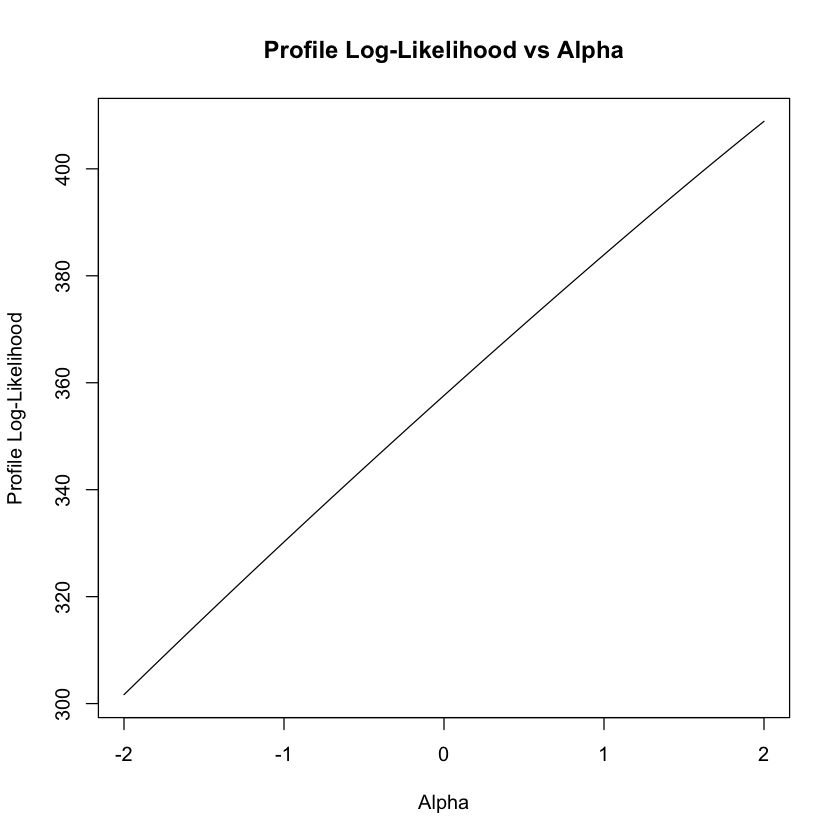

In [3]:
# Assuming the dataset contains 'x' and 'Y'
x <- x  # Predictor variable
Y <- Y  # Response variable

# Add intercept to predictor matrix
X <- cbind(1, x)

# Define a range of alpha values
alpha_values <- seq(-2, 2, by = 0.1)

# Calculate the profile log-likelihood for each alpha
log_likelihoods <- sapply(alpha_values, function(a) profile_log_likelihood(a, Y, X))

# Plot the profile log-likelihood
plot(alpha_values, log_likelihoods, type = "l", xlab = "Alpha", ylab = "Profile Log-Likelihood",
     main = "Profile Log-Likelihood vs Alpha")


In [9]:
# Load required library
library(ggplot2)

# Create a data frame for plotting
plot_data <- data.frame(
  alpha = alpha_values,
  log_likelihood = log_likelihoods
)

# Find the maximum log-likelihood value and corresponding alpha
max_likelihood <- max(log_likelihoods)
max_alpha <- alpha_values[which.max(log_likelihoods)]

# Generate the enhanced plot
profile_plot <- ggplot(plot_data, aes(x = alpha, y = log_likelihood)) +
  geom_line(color = "blue", size = 1) +       # Line with specified color and size
  geom_hline(yintercept = max_likelihood, linetype = "dashed", color = "red") + # Add horizontal reference line
  annotate("point", x = max_alpha, y = max_likelihood, color = "red", size = 3) + # Highlight maximum point
  annotate("text", x = max_alpha, y = max_likelihood + 10, 
           label = paste0("Max at alpha = ", round(max_alpha, 2)), 
           color = "red", size = 4, hjust = 0.5) +  # Add annotation for max point
  theme_classic() +                          
  labs(
    title = "Profile Log-Likelihood vs Alpha",
    x = expression(alpha),                   
    y = "Profile Log-Likelihood"
  ) +
  theme(
    plot.title = element_text(size = 16, face = "bold"), 
    axis.title = element_text(size = 14),               
    axis.text = element_text(size = 12)                 
  )

# Save the enhanced plot to a file
ggsave("profile_log_likelihood_plot.pdf", plot = profile_plot, width = 8, height = 6, dpi = 300)

7. Determine the ML-estimate of $\alpha$ visually from this plot.

One can see the ML-estimate where the profile log-likelihood reaches its maximum, thus: $\hat{\alpha}=2.0$

8. Finally, which transformation would you consider for the analysis of the data?